# BIOS 512 Final Project: A Brief Glimpse Into the History of Scooby Doo
## Coder: Benji Cherian

![](https://www.listchallenges.com/f/items/2e7c74ab-874e-4292-93c1-57fff3a736ce.jpg)



#### Scooby-Doo is remarkable for being such a long running tv series. A quick search online reveals that the show is still going strong even today (https://www.diversetechgeek.com/why-scooby-doo-still-popular/). The goal of this project is to look closer at some features of a scooby dataset that contain meta information about each of the episodes.

#### **Important Note:** 
#### *I found the following data through TidyTuesday, however, the original creator "plummye" spent 1 year manually creating this dataset and uploaded it to Kraggle*
#### *(https://www.kaggle.com/williamschooleman/scoobydoo-complete).*
#### *Thank you to "plummye" for taking the effort to compile this data.*


### **Loading Appropriate Packages and Pulling in the Data**

In [2]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
scooby = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-07-13/scoobydoo.csv', 
                  col_types = cols())

## **Looking at elements of the data**
#### Before doing anything else, it seems appropriate to get a sense of the breakdown of certain variables.


In [3]:
scooby %>% head(5)

index,series_name,network,season,title,imdb,engagement,date_aired,run_time,format,⋯,batman,scooby_dum,scrappy_doo,hex_girls,blue_falcon,fred_va,daphnie_va,velma_va,shaggy_va,scooby_va
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<chr>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,"Scooby Doo, Where Are You!",CBS,1,What a Night for a Knight,8.1,556,1969-09-13,21,TV Series,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
2,"Scooby Doo, Where Are You!",CBS,1,A Clue for Scooby Doo,8.1,479,1969-09-20,22,TV Series,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
3,"Scooby Doo, Where Are You!",CBS,1,Hassle in the Castle,8,455,1969-09-27,21,TV Series,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
4,"Scooby Doo, Where Are You!",CBS,1,Mine Your Own Business,7.8,426,1969-10-04,21,TV Series,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
5,"Scooby Doo, Where Are You!",CBS,1,Decoy for a Dognapper,7.5,391,1969-10-11,21,TV Series,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick


In [4]:
# Listing out all the variables in the dataset
# The list is too long, and, for the sake of submission, I am commenting this part out so things are more concise 
#ls(scooby)


# According to plummye, for IMDB Scores there are some NULL values
# these are in the dataset because there is not currently IMDB ratings for these episodes 
# such they are stored as NULL. The below removes them from the dataset.

scooby_filter = scooby %>% filter(imdb < 9.9)

# Looking to see how many rows of data there in original dataset versus filtered dataset
scooby %>% n_distinct('index')
scooby_filter %>% n_distinct('index')



[1] 603

[1] 588

#### Each row represents a specific episode, so there are 603 episodes in the full dataset and 588 in the complete dataset. (Complete means that each row has the key information that I will need for this project: network, date aired, imdb rating)

#### I know that I have watched this show on three different networks (CBS, Boomerang, and Cartoon Network), but I am curious as to which networks aired the show and how many episodes aired on these networks. So I am first going to catch a glimpse of what the data looks like and then create a graphic to depict the frequencies

In [5]:
# Getting a sense of the categorical breakdown of networks
levels(factor(scooby_filter$network))

[1] "ABC"                  "Adult Swim"           "Boomerang"           
 [4] "Cartoon Network"      "CBS"                  "Syndication"         
 [7] "TBC"                  "The CW"               "The WB"              
[10] "Warner Bros. Picture" "Warner Home Video"

#### I did not expect this many networks to have aired Scooby-Doo. 
#### With this information, **my goal is to look more close at the distribution of episodes aired across each of these networks**

#### *Let's first take a look at the distribution of episodes across networks via a bar chart*

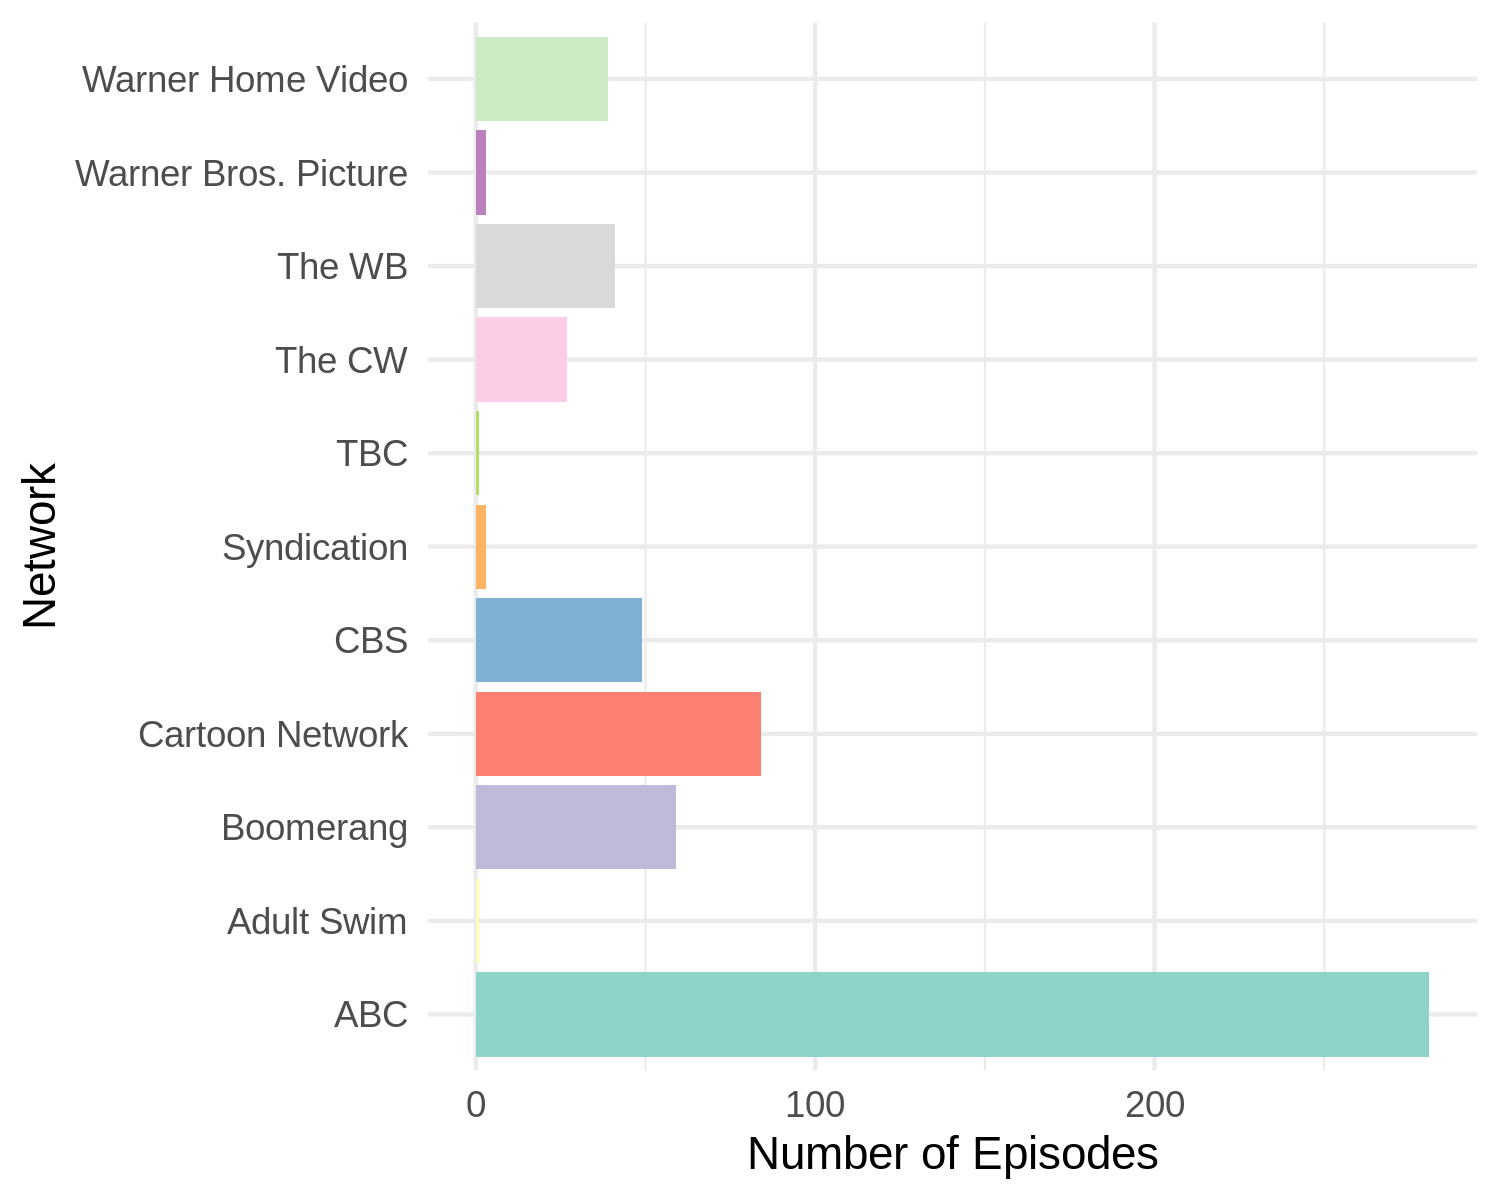

In [6]:
p = ggplot(data = scooby_filter, aes(y = network, fill = network))

p = p + theme_minimal()

p = p + geom_bar() + theme(legend.position = "none") + scale_fill_brewer(palette = "Set3")
# Quick aside, I was reminded that Set 2 can not handles more than 8 different categories, so this is why I used Set 3.

p = p + labs(x = 'Number of Episodes', y = 'Network')

p

![](https://upload.wikimedia.org/wikipedia/commons/e/e5/1971_ABC_logo.png)

#### As it stands, it turns out ABC was the primary network for scooby-doo episodes. I have personally never watched any episodes on ABC, so it's interesting that the majority of episodes were aired on that network. However, there are 4 networks that do not have many episodes and before I move on, I think it's important to try and collapse these networks into one category called "Other." Additionally, for aesthetic purposes, I think it makes more sense to have the bars arranged with the most frequent category on top and the "Other" category at the bottom of the plot. So, **the goal for the next plot is as follows:**
- Create an "Other" category to collapse the 4 smallest groups
- Arrange the networks so that the network with the most number of episodes aired appears first (at the top)
- Ensure that the "Other" category remains at the bottom of the graph

### **Recreating Above Plot with Rearranged Categories**

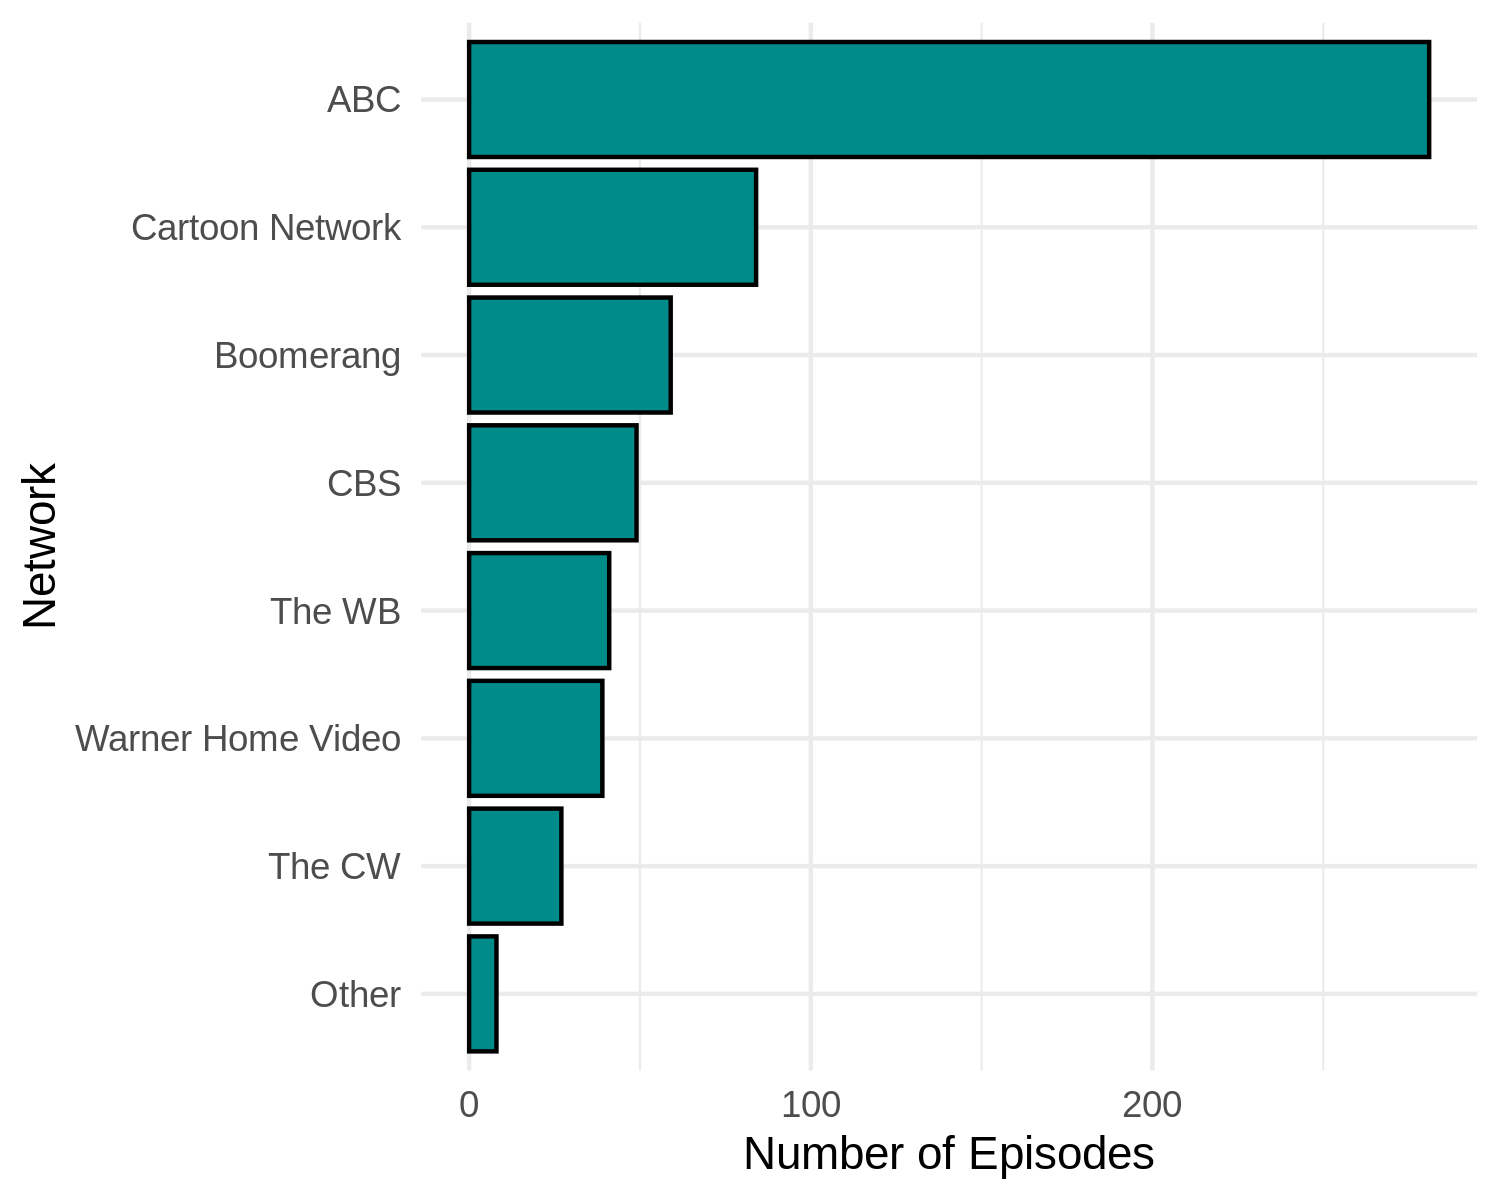

In [7]:
scooby_network_other = scooby_filter %>%
    mutate(network_other = network %>%
                   # Based on the previous graph, I going to group top 7 together
                   # and then create an other category for the other networks
                   fct_lump(n = 7) %>% 
                   # Second, Order the categories by frequency
                   fct_infreq() %>%
                   # Third, force the Other category to be set after Infinity
                   fct_relevel('Other', after= Inf) %>%
                   # Finally, use forcat reverse to make the "Other" category appear at the bottom
                    fct_rev())

p3 = ggplot(data = scooby_network_other, aes(y = network_other))

p3 = p3 + theme_minimal()

p3 = p3 + geom_bar(fill = '#008b8b', color = '#000000') + theme(legend.position = "none")
# Quick aside, I was reminded that Set 2 can not handles more than 8 different categories, so this is why I used Set 3.

p3 = p3 + labs(x = 'Number of Episodes', y = 'Network')

p3

#### It's much clearer to see how the networks compare to each other. Aside from ABC, the rest of the categories (except other) have relatively similar number of episodes aired (with the exception of Cartoon Network having much more than the others). 
#### Seeing as there are so many different networks that have aired Scooby-doo, I am curious about the general IMDB rating of these episodes. Additionally, I am curious to investigate if there is, at all, a trend over time. 

#### So for now, **the goal is to create a plot of the distribution of IMDB scores across time grouped by Network**


![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/IMDB_Logo_2016.svg/200px-IMDB_Logo_2016.svg.png)

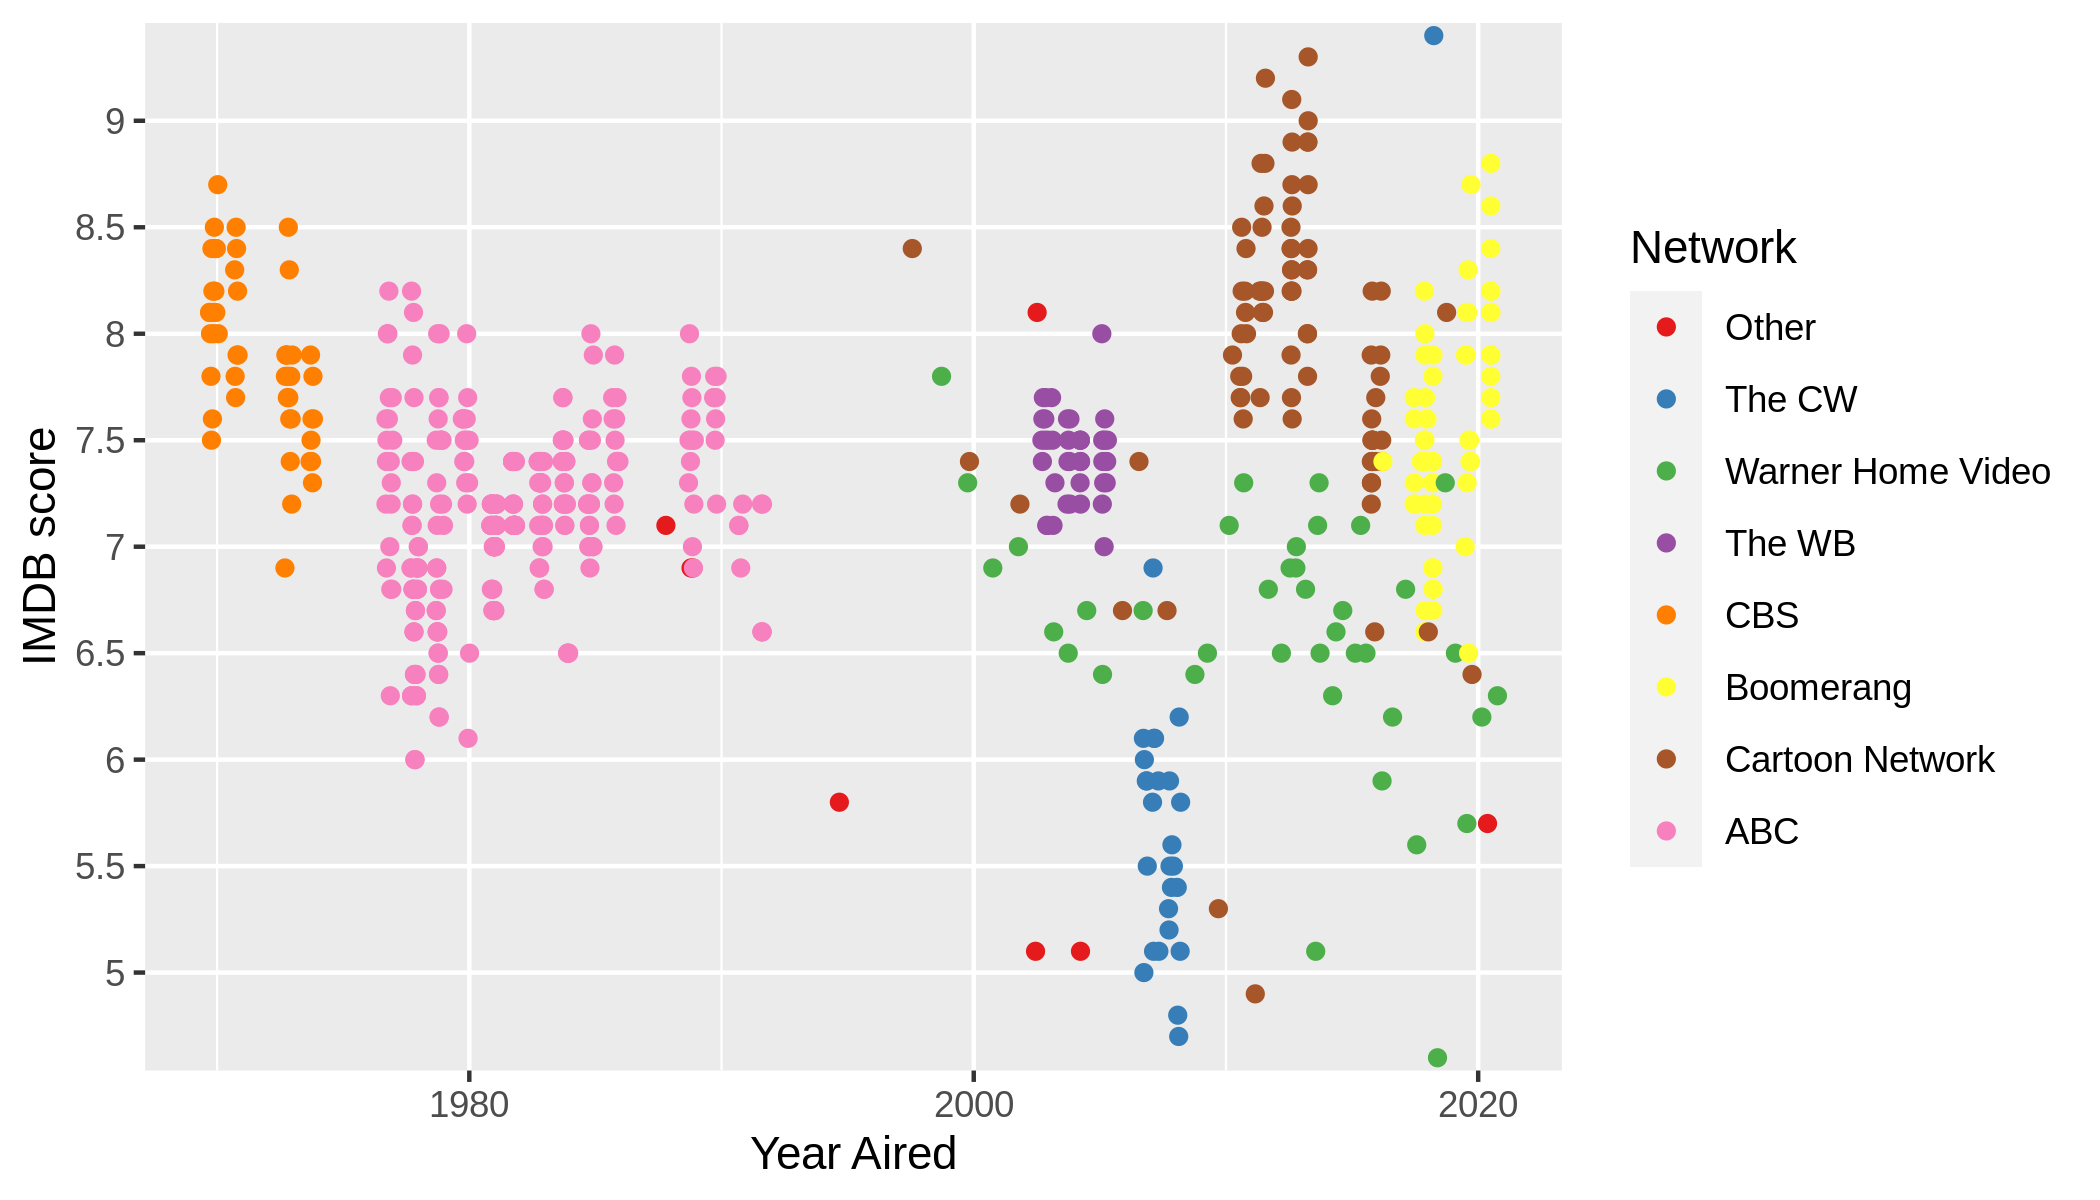

In [10]:
options(repr.plot.width = 7, repr.plot.height = 4)

p5 = ggplot(scooby_network_other, aes(x = date_aired, y = imdb, color = network_other))

p5 = p5 + geom_point() + labs(y = 'IMDB score', x = 'Year Aired', color = 'Network')

p5 = p5 + scale_color_brewer(palette = "Set1") + scale_y_discrete(breaks=seq(4,10,by=0.5)) + scale_x_date(date_labels = "%Y")

p5

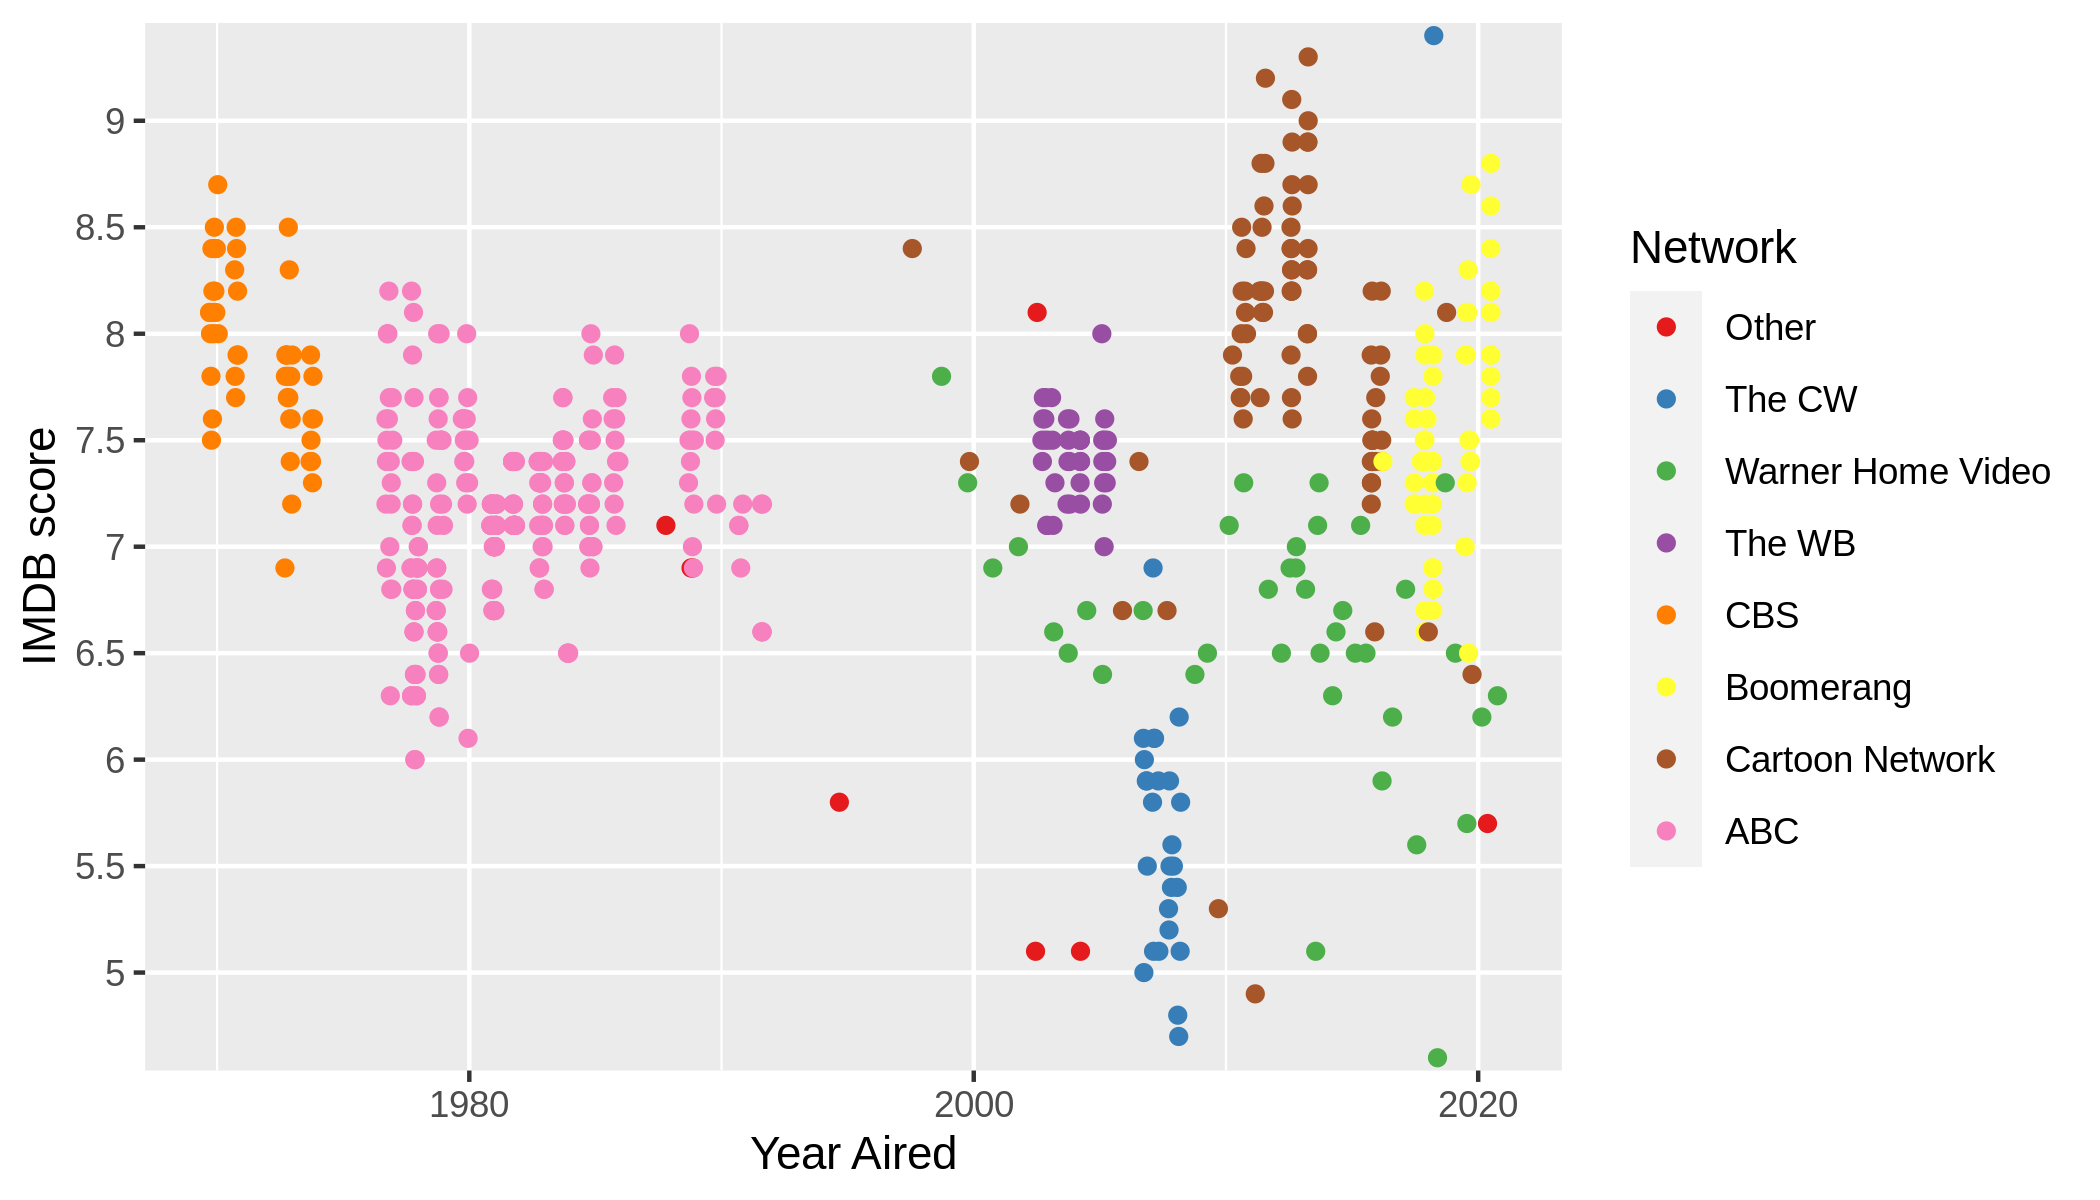

In [32]:
options(repr.plot.width = 7, repr.plot.height = 4)

p5 = ggplot(scooby_network_other, aes(x = date_aired, y = imdb, color = network_other))

p5 = p5 + geom_point() + labs(y = 'IMDB score', x = 'Year Aired', color = 'Network')

p5 = p5 + scale_color_brewer(palette = "Set1") + scale_y_discrete(breaks=seq(4,10,by=0.5)) + scale_x_date(date_labels = "%Y")

p5

#### It appears that on average the show aired toward the beginning of the show's lifespan were more highly rated compared to shows aired later.

#### I find it particulary interesting that prior to 2000 the IMDB ratings for the show are more clustered together (around 7) compared to post-2000 shows. Even more interesting is the fact that both the highest and lowest rated shows both occur within the last five years. After seeing this, I want to explore the range of IMDB scores by network.
#### So **the goal is:**
- Create a dataset that contains the minimum and maximum IMDB ratings for each network in a wide format
- Pivot the Wide dataset into a Long Format
- Graph a plot that uses both datasets to depict the range of values


### Creating Min & Max IMDB Rating Variable and Storing in a Wide Dataset

In [8]:
scooby_minmax = scooby_network_other %>% 
                    filter(imdb < 9.9) %>% 
                        group_by(network_other) %>% 
                            summarize(min = min(imdb), max = max(imdb))
# Verifying that this worked
scooby_minmax %>% head(15)

network_other,min,max
<fct>,<chr>,<chr>
Other,5.1,8.1
The CW,4.6,9.6
Warner Home Video,4.2,7.8
The WB,7,8
CBS,6.9,8.7
Boomerang,6.5,8.8
Cartoon Network,4.9,9.3
ABC,6,8.2


In [28]:
scooby_minmax = scooby_network_other %>% 
                    filter(imdb < 9.9) %>% 
                        group_by(network_other) %>% 
                            summarize(min = min(imdb), max = max(imdb))
# Verifying that this worked
scooby_minmax %>% head(15)


network_other,min,max
<fct>,<chr>,<chr>
Other,5.1,8.1
The CW,4.6,9.6
Warner Home Video,4.2,7.8
The WB,7,8
CBS,6.9,8.7
Boomerang,6.5,8.8
Cartoon Network,4.9,9.3
ABC,6,8.2


### Creating a Long Dataset Using the Previous Dataset

In [9]:
Scooby_long = 
              scooby_minmax %>%
                  pivot_longer(cols = c(min,max), names_to = 'label')

# Checking Work
Scooby_long %>% head(5)

network_other,label,value
<fct>,<chr>,<chr>
Other,min,5.1
Other,max,8.1
The CW,min,4.6
The CW,max,9.6
Warner Home Video,min,4.2


In [29]:
Scooby_long = 
              scooby_minmax %>%
                  pivot_longer(cols = c(min,max), names_to = 'label')

# Checking Work
Scooby_long %>% head(5)


network_other,label,value
<fct>,<chr>,<chr>
Other,min,5.1
Other,max,8.1
The CW,min,4.6
The CW,max,9.6
Warner Home Video,min,4.2


##### Excellent, that's exactly what I wanted. Now I have 2 rows per network, one with a minimum IMDB rating and one with a maximum IMDB rating.

### Creating a Plot of the Range of IMDB Values by Network Using Both the Long and Wide Datasets

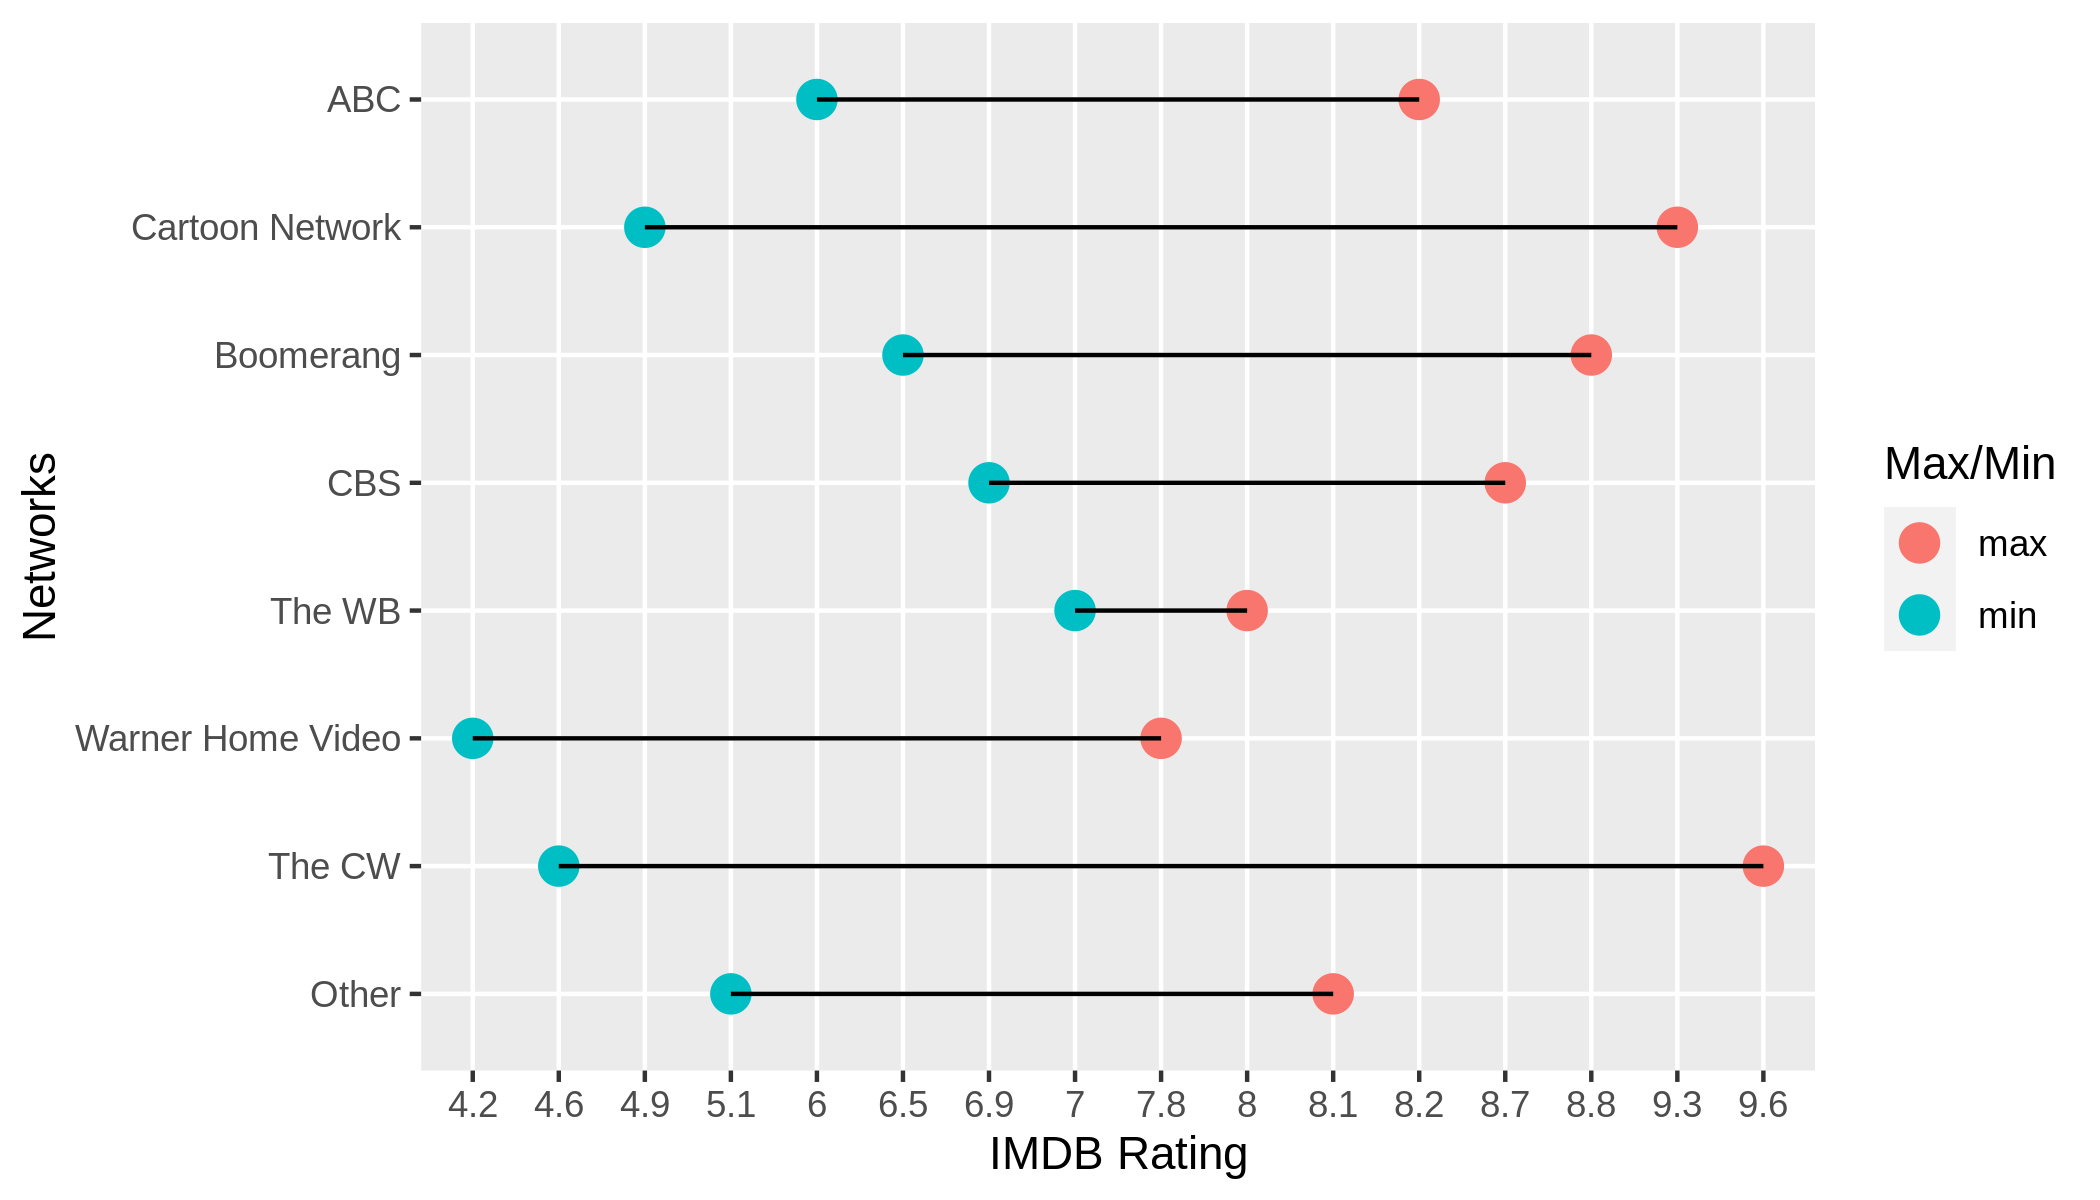

In [30]:
p8 = ggplot(Scooby_long, aes(x = value, y = network_other))

p8 = p8 + geom_point(mapping = aes(color = label), size = 4 )

p8 = p8 + geom_segment(scooby_minmax, mapping = aes(x = min, xend = max, y = network_other, yend = network_other))

p8 = p8 + labs(x = 'IMDB Rating', y = 'Networks', color = 'Max/Min')

p8

#### Looking at this it's much clearer that Warner Home Video is the network with the Lowest rated Scooby-Doo episode and "The CW" has the highest rated episode. Equally amazing is the range that the CW spans, the CW has the widest range of scores compared to any other network with the next largest range belonging to Cartoon Network. 

#### Looking through this data has increased my appreciation for the evolution of this show. It's heartening to see that the show is still going strong and that some of the most highly rated episodes have occurred more recently (though the reverse is also true). It will be interesting to see where the show goes from here and for how much longer it will continue to air.

#### Below is an image taken from the following article: https://www.thingslife.com/how-cartoon-characters-have-evolved-over-time/.  
#### It clearly shows how many iterations the show has experienced, and it seems like there isn't an end in sight for this beloved mystery show

![](https://www.thingslife.com/wp-content/uploads/2016/03/08-Scooby-Doo.jpg)